In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from matplotlib import pyplot as plt
import seaborn as sns

import datetime
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


In [2]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Load the data from an Excel file
data = pd.read_csv('RFM tesis.csv')
data.head()

,Retail ID,Max of Tanggal,Count of Billing,Sum of Actual Rp
0,2100023,7/31/2023,30,2.726486e+08
1,2100060,11/5/2022,5,2.902441e+07
2,2112600,8/23/2023,4,9.941438e+06
3,2112602,12/27/2023,110,8.999598e+08
4,2112603,11/24/2023,174,1.593736e+09


In [5]:
# Check the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retail ID         3170 non-null   int64  
 1   Max of Tanggal    3170 non-null   object 
 2   Count of Billing  3170 non-null   int64  
 3   Sum of Actual Rp  3170 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 99.2+ KB


In [6]:
data['Sum of Actual Rp'] = pd.to_numeric(data['Sum of Actual Rp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retail ID         3170 non-null   int64  
 1   Max of Tanggal    3170 non-null   object 
 2   Count of Billing  3170 non-null   int64  
 3   Sum of Actual Rp  3170 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 99.2+ KB


In [7]:
data['Max of Tanggal'] = pd.to_datetime(data['Max of Tanggal'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retail ID         3170 non-null   int64         
 1   Max of Tanggal    3170 non-null   datetime64[ns]
 2   Count of Billing  3170 non-null   int64         
 3   Sum of Actual Rp  3170 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 99.2 KB


In [8]:
# Calculate the reference date
pin_date = max(data['Max of Tanggal']) + dt.timedelta(1)
pin_date

Timestamp('2024-01-01 00:00:00')

In [9]:
# Perform RFM analysis
rfm = data.groupby('Retail ID').agg({
    'Max of Tanggal': lambda x: (pin_date - x.max()).days,
    'Count of Billing': 'sum',
    'Sum of Actual Rp': 'sum'
})
rfm

,Max of Tanggal,Count of Billing,Sum of Actual Rp
Retail ID,,,
2100000,612,7,1.734234e+08
2100023,154,90,1.242165e+10
2100032,270,1,7.586540e+05
2100060,1,6,3.947486e+07
2100338,684,35,1.069030e+10
...,...,...,...
2131041,696,1,3.448648e+06
2131045,665,1,2.522522e+06
2300000,678,75,5.202227e+09


In [10]:
data["Sum of Actual Rp"] = data["Sum of Actual Rp"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retail ID         3170 non-null   int64         
 1   Max of Tanggal    3170 non-null   datetime64[ns]
 2   Count of Billing  3170 non-null   int64         
 3   Sum of Actual Rp  3170 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 99.2 KB


In [11]:
# Rename the columns for RFM analysis
rfm.rename(columns={
    'Max of Tanggal': 'Recency',
    'Count of Billing': 'Frequency',
    'Sum of Actual Rp': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
Retail ID,,,
2100000,612,7,1.734234e+08
2100023,154,90,1.242165e+10
2100032,270,1,7.586540e+05
2100060,1,6,3.947486e+07
2100338,684,35,1.069030e+10
...,...,...,...
2131041,696,1,3.448648e+06
2131045,665,1,2.522522e+06
2300000,678,75,5.202227e+09


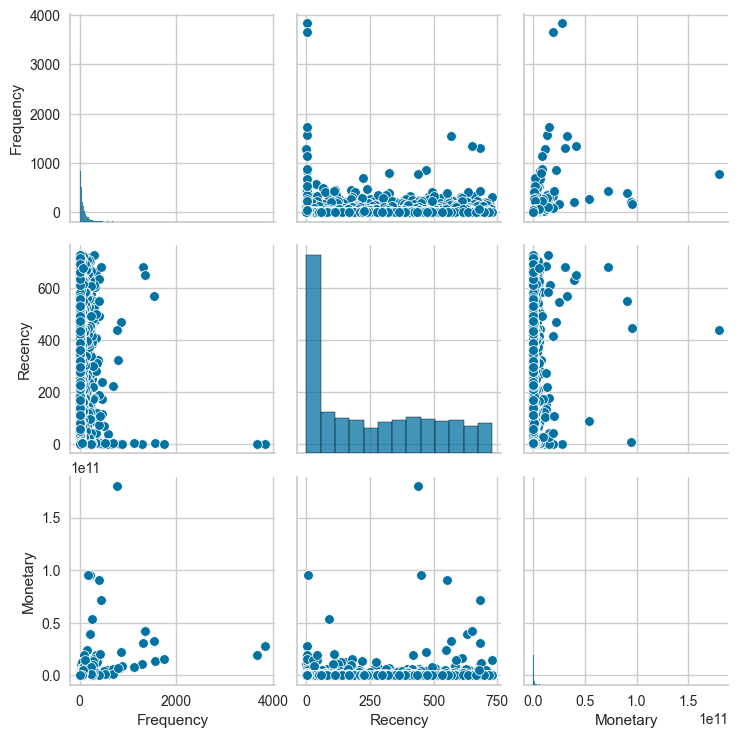

In [12]:
sns.pairplot(rfm[['Frequency','Recency','Monetary']])

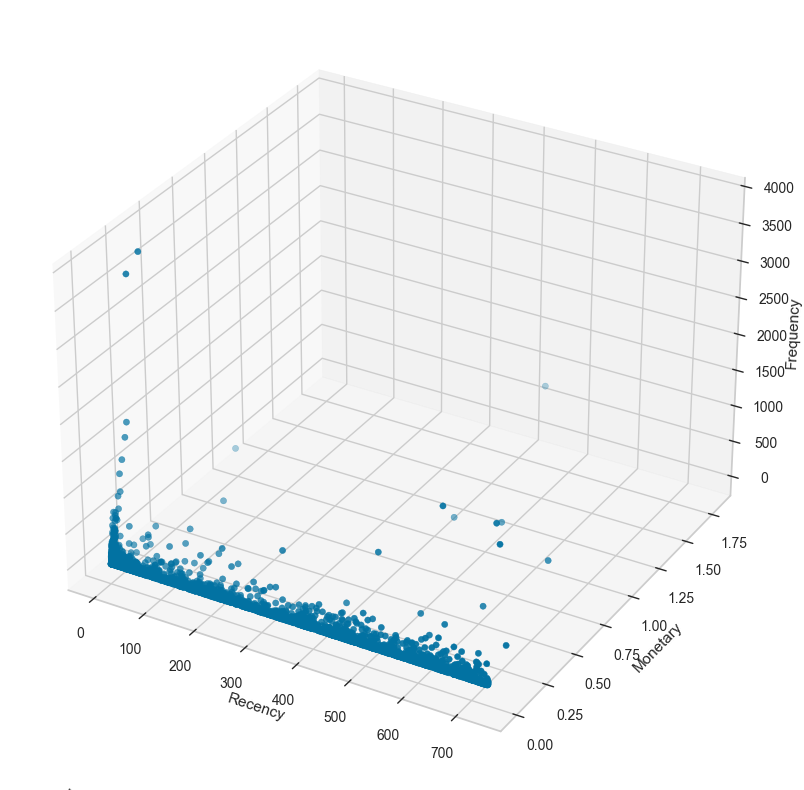

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Monetary'], rfm['Frequency'])
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')

plt.show()

In [13]:
from sklearn.neighbors import LocalOutlierFactor

In [14]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(rfm)
outliers_indices = rfm[outliers == -1].index
data_clean = rfm.drop(outliers_indices)

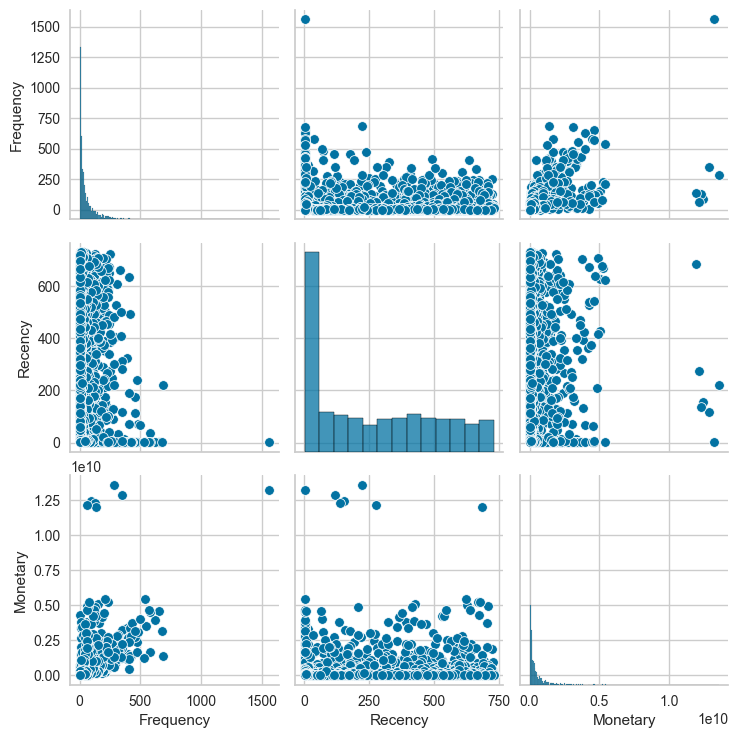

In [15]:
sns.pairplot(data_clean[['Frequency','Recency','Monetary']])

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean[['Recency', 'Frequency', 'Monetary']])

In [21]:
X_scaled

array([[ 1.4860113 , -0.58441949, -0.2592857 ],
       [-0.45365518,  0.4096228 , 13.29334648],
       [ 0.03761406, -0.65627797, -0.45033882],
       ...,
       [ 1.76552656,  0.2299766 ,  5.30507178],
       [-1.08468205, -0.12931579, -0.33847199],
       [-0.85598775, -0.65627797, -0.44037646]])

MACHINE LEARNING 

In [22]:
from sklearn.cluster import DBSCAN

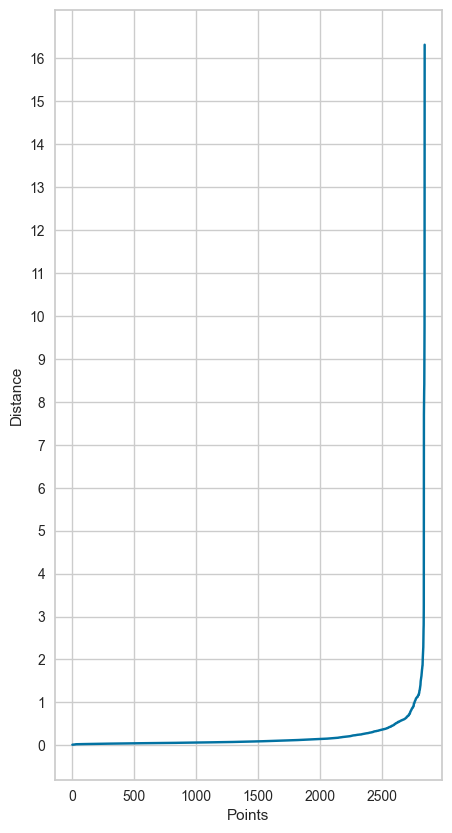

In [23]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_scaled)

distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:, 10], axis=0)

fig = plt.figure(figsize=(5, 10))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

# Specify y-axis ticks with intervals of 1 unit
plt.yticks(np.arange(int(distances.min()), int(distances.max()) + 1, step=1))

# Check for optimal eps value for DBSCAN 
plt.show()

In [24]:
distances

array([1.35887791e-02, 1.37908971e-02, 1.40023134e-02, ...,
       9.30372901e+00, 9.77631690e+00, 1.63206474e+01])

In [27]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


0.39978347687468785


<Figure size 500x500 with 0 Axes>

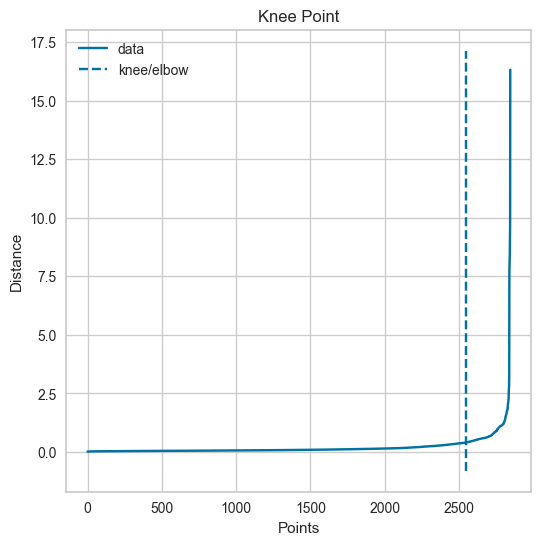

In [28]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [29]:
dbscan = DBSCAN(eps=0.399, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

In [30]:
data_clean['Cluster'] = labels

In [31]:
data_clean.head()

,Recency,Frequency,Monetary,Cluster
Retail ID,,,,
2100000,612,7,1.734234e+08,0
2100023,154,90,1.242165e+10,-1
2100032,270,1,7.586540e+05,0
2100060,1,6,3.947486e+07,0
2100693,666,1,1.252252e+06,0


In [32]:
from sklearn.metrics import silhouette_score

# Check silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1934916705152525


In [33]:
data_clean['Cluster'].value_counts()

Cluster
 0    2618
-1     218
 1       9
Name: count, dtype: int64

In [29]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
data_clean['Cluster'] = dbscan.fit_predict(X_scaled)

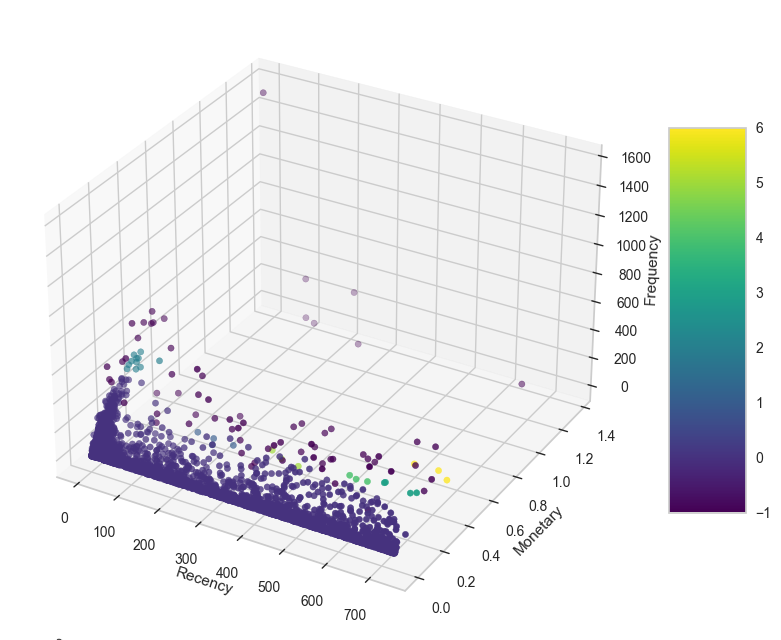

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(data_clean['Recency'], data_clean['Monetary'], data_clean['Frequency'], c=data_clean['Cluster'],cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

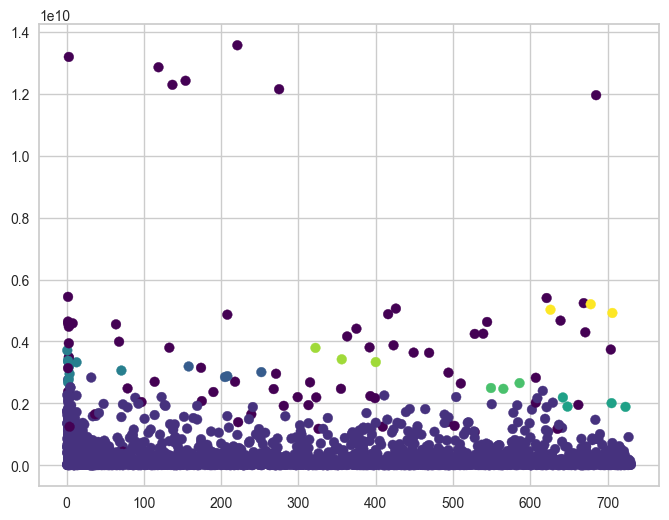

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.scatter(data_clean['Recency'], data_clean['Monetary'],c=data_clean['Cluster'],cmap='viridis')

In [35]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clean)
    inertias.append(kmeans.inertia_)

In [36]:
results = []

for i in range(2, 10):
    k = i
    kmeans = KMeans(n_clusters=k, random_state=42)
    data_clean['Cluster'] = kmeans.fit_predict(data_clean)  
    silhouette_avg = silhouette_score(data_clean, data_clean['Cluster'])  
    results.append((silhouette_avg)) 

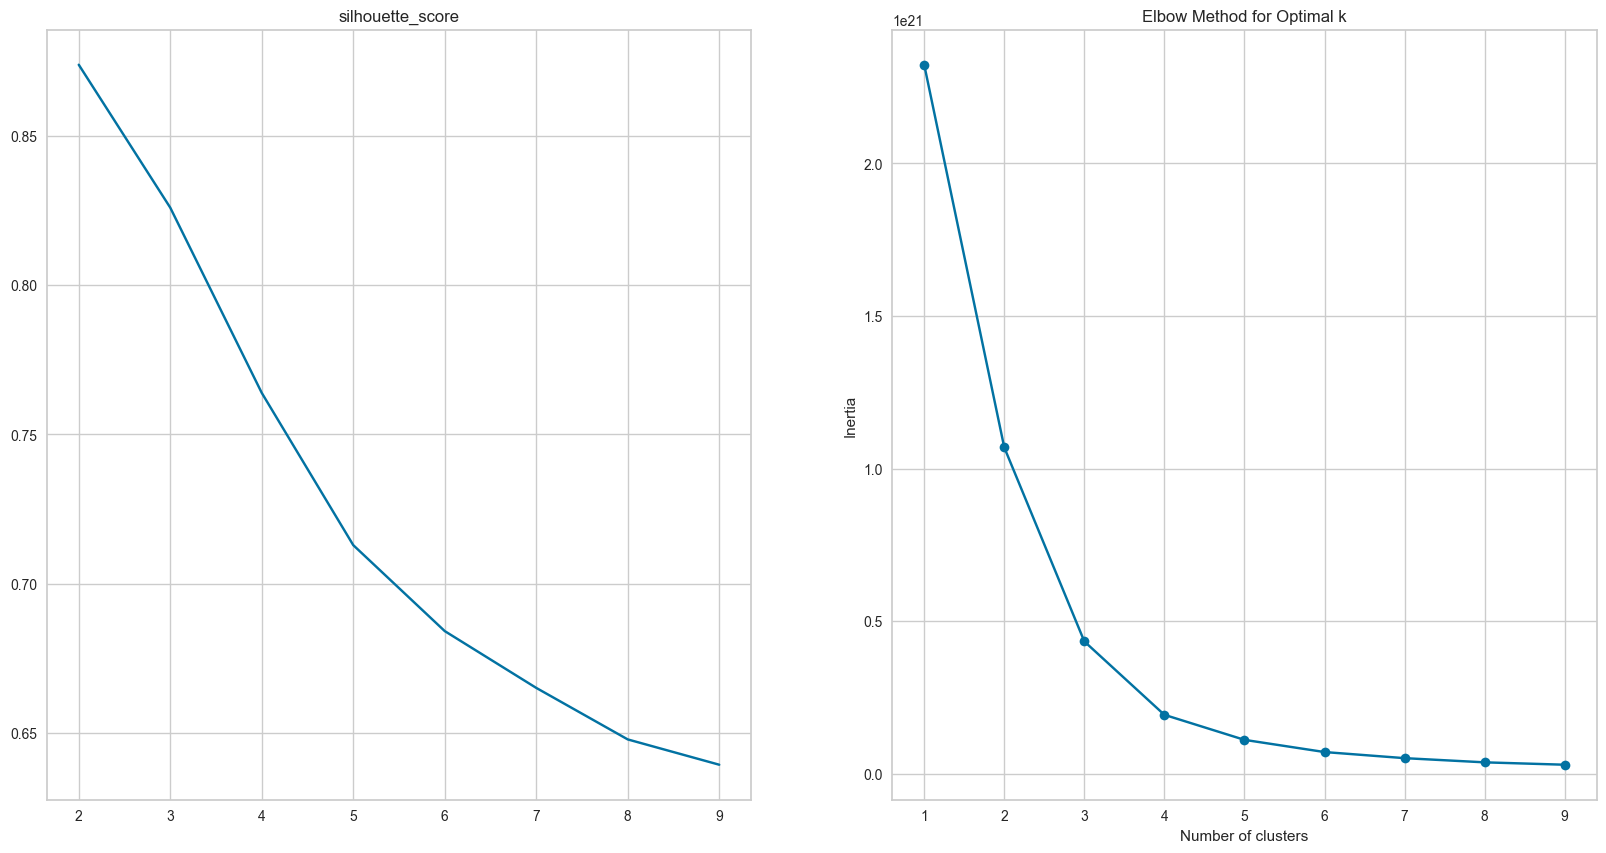

In [42]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
x = [2,3,4,5,6,7,8,9]
y = results
plt.plot(x,y)
plt.title('silhouette_score')

ax = fig.add_subplot(1,2,2)
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()

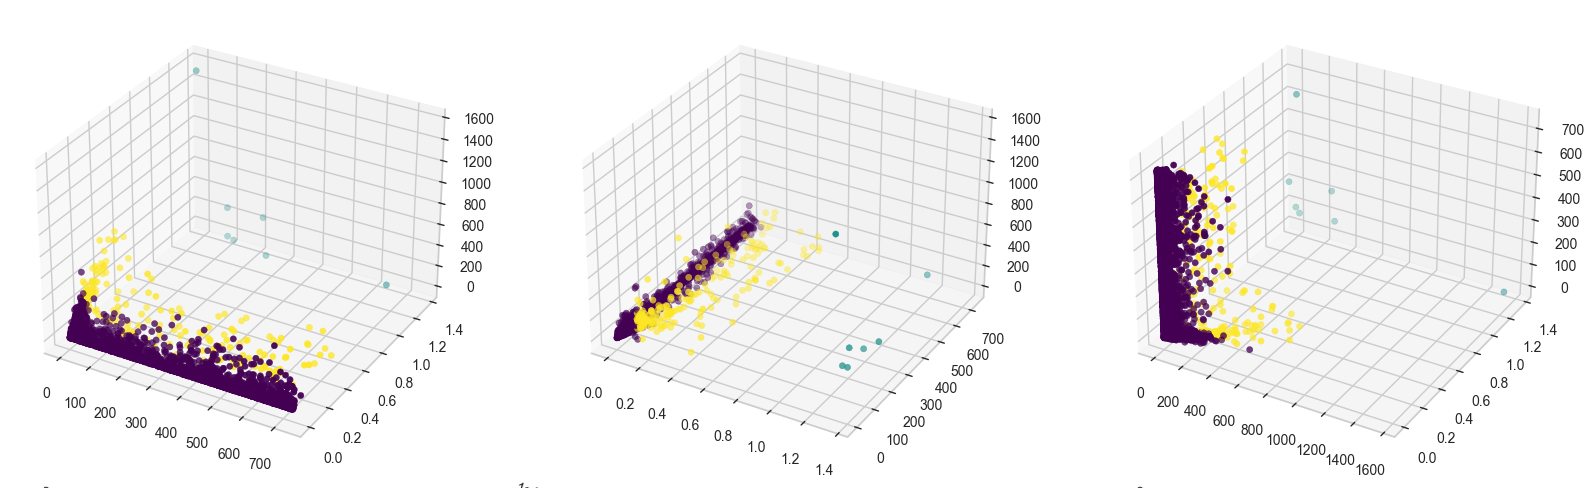

In [38]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data_clean['Cluster'] = kmeans.fit_predict(data_clean)



fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(data_clean['Recency'], data_clean['Monetary'], data_clean['Frequency'], c=data_clean['Cluster'], cmap='viridis')


ax = fig.add_subplot(132, projection='3d')
ax.scatter(data_clean['Monetary'],data_clean['Recency'], data_clean['Frequency'], c=data_clean['Cluster'], cmap='viridis')


ax = fig.add_subplot(133, projection='3d')
ax.scatter( data_clean['Frequency'],data_clean['Monetary'],data_clean['Recency'], c=data_clean['Cluster'], cmap='viridis')


plt.show()

In [39]:
data_clean.head()

,Recency,Frequency,Monetary,Cluster
Retail ID,,,,
2100000,612,7,1.734234e+08,0
2100023,154,90,1.242165e+10,1
2100032,270,1,7.586540e+05,0
2100060,1,6,3.947486e+07,0
2100693,666,1,1.252252e+06,0


In [40]:
data_clean['Cluster'].value_counts()

Cluster
0    2643
2     195
1       7
Name: count, dtype: int64